In [1]:
import tensorflow as tf
import os
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

In [2]:
data_path = "./Dataset/"
counter = 0
x, y = [], []
img_rows, img_cols = 224, 224
classes = os.listdir(data_path)

for class_path in classes:
    for img_path in os.listdir(f"{data_path}{class_path}"):
        path = f"{data_path}{class_path}/{img_path}"
        label = counter
        image = tf.keras.preprocessing.image.load_img(path, color_mode="grayscale", target_size=(img_rows, img_rows))
        image = tf.keras.preprocessing.image.img_to_array(image)
        x.append(image)
        y.append(label)
    counter += 1

x = np.array(x)
y = np.array(y)

In [3]:
x = x.astype("float32") / 255.0

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

y_train = keras.utils.to_categorical(y_train, num_classes=4)
y_test = keras.utils.to_categorical(y_test, num_classes=4)
y_val = keras.utils.to_categorical(y_val, num_classes=4)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(6, (5,5), activation="relu", input_shape=(img_rows, img_cols, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(keras.layers.Conv2D(16, (5,5), activation="relu"))
model.add(keras.layers.Conv2D(16, (5,5), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120, activation="relu"))
model.add(keras.layers.Dense(4, activation="softmax"))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 220, 220, 6)       156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 6)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 conv2d_3 (Conv2D)           (None, 102, 102, 16)      6416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 51, 51, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41616)            

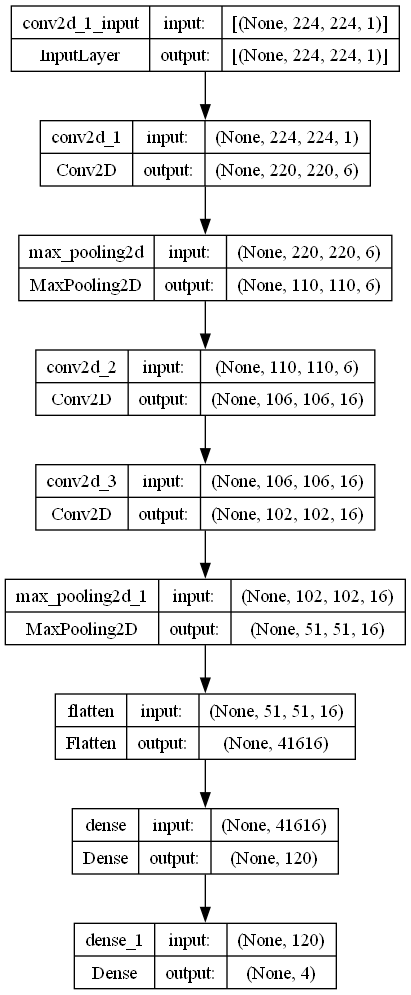

In [7]:
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [10]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=120, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
 2/14 [===>..........................] - ETA: 25s - loss: 1.3131 - accuracy: 0.3667

KeyboardInterrupt: 

In [ ]:
score = model.evaluate(x_test, y_test)
print(f"Loss Score: {score[0]}")
print(f"Accuracy Score: {score[1]}")

In [ ]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.axis("off")
    plt.imshow(x_test[i], cmap="gray")
    plt.text(0.5, -0.3, f"True Label: {true_labels}", fontsize=12, ha="center", transform=plt.gca().transAxes)
    plt.text(0.5, -0.5, f"Pred Label: {predicted_labels}", fontsize=12, ha="center", transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")